In [6]:
%matplotlib inline

## [Nearest Neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
- Foundation of many supervised & unsupervised learning methods.
- Goal: find a **predefined number** of samples closest to a point & predict the label from that population.
- nsamples can be a constant ([knn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)) or vary based on local density ([radius-based](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier)).
- distances can be measured many ways; Euclidean distance is most common.
- Base algorithm uses uniform weights (simple majority vote of NNs). Can over-weight closer samples via ```weights='distance'```. (default: ```weights='uniform'```).
- NN algorithms are **non-generalizing**. (They remember all the training data, often using an indexing structure such as a Ball Tree or K-D Tee.
- Scikit implementation accepts dense (NumPy.ndarray) or sparse (SciPy.sparse) data. Dense matrices can use [multiple distance options](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric); sparse matrices are supported with **Minkowski** metrics.

## Unsupervised NN
- Provides uniform interface to [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree), [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) and [Pairwise "Brute Force"](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise) NN algorithms via the ```algorithm``` param.
- If ```algorithm='auto'``` is used, NN tries to find an optimum algorithm from the training data.

In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([
    [-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

nbrs = NearestNeighbors(
    n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

print(distances)
print(indices)

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]
[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]


In [4]:
# build sparse graph of neighbor connections
print(nbrs.kneighbors_graph(X).toarray())

[[1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1.]]


In [5]:
# using KDTree explicitly to find NNs
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], 
              [ 1,  1], [ 2,  1], [ 3,  2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

## NN-based Classification


## Example

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [8]:
n_neighbors = 15
iris        = datasets.load_iris()
X           = iris.data[:, :2]
y           = iris.target
h           = .02  # step size in the mesh
cmap_light  = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold   = ListedColormap(['darkorange', 'c', 'darkblue'])

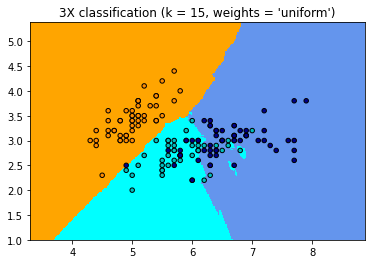

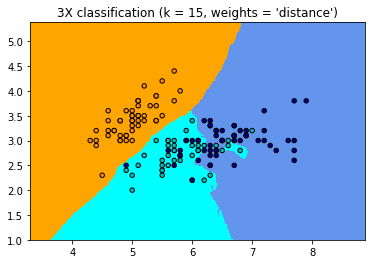

In [10]:
for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(
        n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max =  X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max =  X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), 
                          yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], 
                X[:, 1], 
                c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3X classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## NN Regression
- Use when data labels are _continuous_, not discrete. (Computed labels = mean of NNs.)
- [kNN regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) uses k NNs of each query point; [Radius NN regression](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor) uses radius-based mean.
- Default = uniform weights; can be changed (see above).

## Example: Multi-output NN Regression
- task: use upper half of each face image (X), match to lower half of each face (Y)
- 1st column = "true" faces
- 2nd-5th columns = upper/lower half reconstructions using 4 techniques (extra trees, KNNs, linear regression, ridge regression).

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [12]:
data, targets = fetch_olivetti_faces(return_X_y=True)
train = data[targets < 30]
test  = data[targets >= 30]  # Test on independent people

In [13]:
# Test on a subset of people
n_faces  = 5
rng      = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test     = test[face_ids, :]

In [14]:
n_pixels = data.shape[1]
# X_train,y_train = upper/lower halves
X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:,   n_pixels      // 2:]
X_test  = test[:,  :(n_pixels + 1) // 2]
y_test  = test[:,    n_pixels      // 2:]

In [15]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, 
                                       max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

In [16]:
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face upper/lower half match", size=14)


Text(0.5, 0.98, 'Face upper/lower half match')

<Figure size 720x813.6 with 0 Axes>

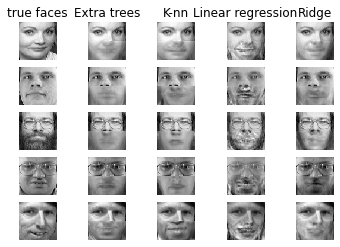

In [17]:
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, 
                          n_cols, 
                          i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, 
                          n_cols, 
                          i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], 
                                    y_test_predict[est][i]))
        if i:
            sub = plt.subplot(n_faces, 
                              n_cols, 
                              i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, 
                              n_cols, 
                              i * n_cols + 2 + j,
                              title=est)
        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

## NN algorithms
- Brute Force
    - Specified using ```algorithm='brute'```
    - Scalability: $O[D N^2]$. Quickly becomes infeasible as nsamples increases.
- K-D Tree
    - Addresses complexity by encoding __aggregate distance information__ in a structure.
    - Binary tree; recursively partitions data into nested orthotropic regions for storage.
    - Very fast for D<20, but bogs down for larger D. (ie, "curse of dimensionality".)
    - Specified using ```algorithm='kd_tree'```
- Ball Tree
    - Addresses dimensionality problem using _nested hypersphere_ data structure.
    - Tree construction = more costly, but retrieval = acceptable even for high values of D.
    - Data divided into nodes with centroid __C__ and radius __r__.
    - Specified using ```algorithm='ball_tree'```.

## [Nearest Centroid Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html#sklearn.neighbors.NearestCentroid)
- Represents each class by the centroid of its members (similar to KNN).
- No params to tweak, so it's OK as a baseline.
- Suffers when classes are non-convex or drastically difference variances.

In [18]:
from sklearn.neighbors import NearestCentroid
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = NearestCentroid()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


## Example: Nearest Centroid Classification
- 3 classes

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

In [20]:
n_neighbors = 15
iris        = datasets.load_iris()
X           = iris.data[:, :2]
y           = iris.target
h           = .02  # step size in the mesh
cmap_light  = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold =  ListedColormap(['darkorange', 'c', 'darkblue'])

None 0.8133333333333334
0.2 0.82


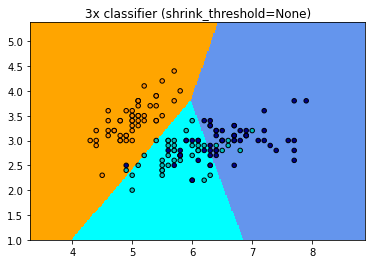

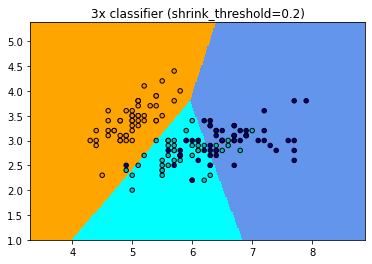

In [21]:
for shrinkage in [None, .2]:
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], 
                X[:, 1], 
                c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("3x classifier (shrink_threshold=%r)"
              % shrinkage)
    plt.axis('tight')

plt.show()

## NN Transformer
- NN is used by many Scikit estimators. The algo is usually embedded, but most estimators also accept *precomputed* NN sparse graphs for use in scikit pipelines.
- Options: binary adjacency graphs (```mode='connectivity'```) and distance graphs (```mode='distance'```)

In [1]:
# precomputed graphs can be reused 
# while varying an estimator param
# either manually or using pipeline caching.
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
estimator = make_pipeline(
    KNeighborsTransformer(
        n_neighbors=5, mode='distance'),
    Isomap(neighbors_algorithm='precomputed'),
    memory='/path/to/cache')

## Example: Chaining NN with t-SNE

In [2]:
import time, sys, annoy, nmslib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from scipy.sparse import csr_matrix

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsTransformer
from sklearn.utils._testing import assert_array_almost_equal
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.utils import shuffle

In [3]:
# nmslib wrapper for KNeighborsTransformer
class NMSlibTransformer(TransformerMixin, BaseEstimator):

    def __init__(self, n_neighbors=5, 
                 metric='euclidean', 
                 method='sw-graph',
                 n_jobs=1):
        self.n_neighbors = n_neighbors
        self.method = method
        self.metric = metric
        self.n_jobs = n_jobs

    def fit(self, X):
        self.n_samples_fit_ = X.shape[0]

        # https://github.com/nmslib/nmslib/tree/master/manual
        space = {
            'sqeuclidean': 'l2',
            'euclidean': 'l2',
            'cosine': 'cosinesimil',
            'l1': 'l1',
            'l2': 'l2',
        }[self.metric]

        self.nmslib_ = nmslib.init(method=self.method, space=space)
        self.nmslib_.addDataPointBatch(X)
        self.nmslib_.createIndex()
        return self


In [4]:
    def transform(self, X):
        n_samples_transform = X.shape[0]

        # For compatibility reasons, as each sample is considered as its own
        # neighbor, one extra neighbor will be computed.
        n_neighbors = self.n_neighbors + 1

        results = self.nmslib_.knnQueryBatch(X, 
                                             k=n_neighbors,
                                             num_threads=self.n_jobs)
        indices, distances = zip(*results)
        indices, distances = np.vstack(indices), np.vstack(distances)

        if self.metric == 'sqeuclidean':
            distances **= 2

        indptr = np.arange(0, 
                           n_samples_transform * n_neighbors + 1,
                           n_neighbors)
        kneighbors_graph = csr_matrix((distances.ravel(), 
                                       indices.ravel(),
                                       indptr), 
                                      shape=(n_samples_transform,
                                                       self.n_samples_fit_))

        return kneighbors_graph


In [5]:
class AnnoyTransformer(TransformerMixin, BaseEstimator):
    """Wrapper for using annoy.AnnoyIndex as sklearn's KNeighborsTransformer"""

    def __init__(self, n_neighbors=5, metric='euclidean', n_trees=10,
                 search_k=-1):
        self.n_neighbors = n_neighbors
        self.n_trees = n_trees
        self.search_k = search_k
        self.metric = metric

    def fit(self, X):
        self.n_samples_fit_ = X.shape[0]
        metric = self.metric if self.metric != 'sqeuclidean' else 'euclidean'
        self.annoy_ = annoy.AnnoyIndex(X.shape[1], metric=metric)
        for i, x in enumerate(X):
            self.annoy_.add_item(i, x.tolist())
        self.annoy_.build(self.n_trees)
        return self

    def transform(self, X):
        return self._transform(X)

    def fit_transform(self, X, y=None):
        return self.fit(X)._transform(X=None)

    def _transform(self, X):
        """As `transform`, but handles X is None for faster `fit_transform`."""

        n_samples_transform = self.n_samples_fit_ if X is None else X.shape[0]

        # For compatibility reasons, as each sample is considered as its own
        # neighbor, one extra neighbor will be computed.
        n_neighbors = self.n_neighbors + 1

        indices = np.empty((n_samples_transform, n_neighbors),
                           dtype=np.int)
        distances = np.empty((n_samples_transform, n_neighbors))

        if X is None:
            for i in range(self.annoy_.get_n_items()):
                ind, dist = self.annoy_.get_nns_by_item(
                    i, n_neighbors, self.search_k, include_distances=True)

                indices[i], distances[i] = ind, dist
        else:
            for i, x in enumerate(X):
                indices[i], distances[i] = self.annoy_.get_nns_by_vector(
                    x.tolist(), n_neighbors, self.search_k,
                    include_distances=True)

        if self.metric == 'sqeuclidean':
            distances **= 2

        indptr = np.arange(0, n_samples_transform * n_neighbors + 1,
                           n_neighbors)
        kneighbors_graph = csr_matrix((distances.ravel(), indices.ravel(),
                                       indptr), shape=(n_samples_transform,
                                                       self.n_samples_fit_))

        return kneighbors_graph

In [6]:
def test_transformers():
    """Test that AnnoyTransformer and KNeighborsTransformer give same results
    """
    X = np.random.RandomState(42).randn(10, 2)

    knn = KNeighborsTransformer()
    Xt0 = knn.fit_transform(X)

    ann = AnnoyTransformer()
    Xt1 = ann.fit_transform(X)

    nms = NMSlibTransformer()
    Xt2 = nms.fit_transform(X)

    assert_array_almost_equal(Xt0.toarray(), Xt1.toarray(), decimal=5)
    assert_array_almost_equal(Xt0.toarray(), Xt2.toarray(), decimal=5)


def load_mnist(n_samples):
    """Load MNIST, shuffle the data, and return only n_samples."""
    mnist = fetch_openml("mnist_784")
    X, y = shuffle(mnist.data, mnist.target, random_state=2)
    return X[:n_samples] / 255, y[:n_samples]


In [7]:
def run_benchmark():
    datasets = [
        ('MNIST_2000', load_mnist(n_samples=2000)),
        ('MNIST_10000', load_mnist(n_samples=10000)),
    ]

    n_iter = 500
    perplexity = 30
    # TSNE requires a certain number of neighbors which depends on the
    # perplexity parameter.
    # Add one since we include each sample as its own neighbor.
    n_neighbors = int(3. * perplexity + 1) + 1

    transformers = [
        ('AnnoyTransformer', AnnoyTransformer(n_neighbors=n_neighbors,
                                              metric='sqeuclidean')),
        ('NMSlibTransformer', NMSlibTransformer(n_neighbors=n_neighbors,
                                                metric='sqeuclidean')),
        ('KNeighborsTransformer', KNeighborsTransformer(
            n_neighbors=n_neighbors, mode='distance', metric='sqeuclidean')),
        ('TSNE with AnnoyTransformer', make_pipeline(
            AnnoyTransformer(n_neighbors=n_neighbors, metric='sqeuclidean'),
            TSNE(metric='precomputed', perplexity=perplexity,
                 method="barnes_hut", random_state=42, n_iter=n_iter), )),
        ('TSNE with NMSlibTransformer', make_pipeline(
            NMSlibTransformer(n_neighbors=n_neighbors, metric='sqeuclidean'),
            TSNE(metric='precomputed', perplexity=perplexity,
                 method="barnes_hut", random_state=42, n_iter=n_iter), )),
        ('TSNE with KNeighborsTransformer', make_pipeline(
            KNeighborsTransformer(n_neighbors=n_neighbors, mode='distance',
                                  metric='sqeuclidean'),
            TSNE(metric='precomputed', perplexity=perplexity,
                 method="barnes_hut", random_state=42, n_iter=n_iter), )),
        ('TSNE with internal NearestNeighbors',
         TSNE(metric='sqeuclidean', perplexity=perplexity, method="barnes_hut",
              random_state=42, n_iter=n_iter)),
    ]

    # init the plot
    nrows = len(datasets)
    ncols = np.sum([1 for name, model in transformers if 'TSNE' in name])
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, squeeze=False,
                             figsize=(5 * ncols, 4 * nrows))
    axes = axes.ravel()
    i_ax = 0

    for dataset_name, (X, y) in datasets:

        msg = 'Benchmarking on %s:' % dataset_name
        print('\n%s\n%s' % (msg, '-' * len(msg)))

        for transformer_name, transformer in transformers:
            start = time.time()
            Xt = transformer.fit_transform(X)
            duration = time.time() - start

            # print the duration report
            longest = np.max([len(name) for name, model in transformers])
            whitespaces = ' ' * (longest - len(transformer_name))
            print('%s: %s%.3f sec' % (transformer_name, whitespaces, duration))

            # plot TSNE embedding which should be very similar across methods
            if 'TSNE' in transformer_name:
                axes[i_ax].set_title(transformer_name + '\non ' + dataset_name)
                axes[i_ax].scatter(Xt[:, 0], Xt[:, 1], c=y.astype(np.int32),
                                   alpha=0.2, cmap=plt.cm.viridis)
                axes[i_ax].xaxis.set_major_formatter(NullFormatter())
                axes[i_ax].yaxis.set_major_formatter(NullFormatter())
                axes[i_ax].axis('tight')
                i_ax += 1

    fig.tight_layout()
    plt.show()

In [8]:
run_benchmark()

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'NMSlibTransformer(metric='sqeuclidean', n_neighbors=92)' (type <class '__main__.NMSlibTransformer'>) doesn't

## Example: NN Caching

In [9]:
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline

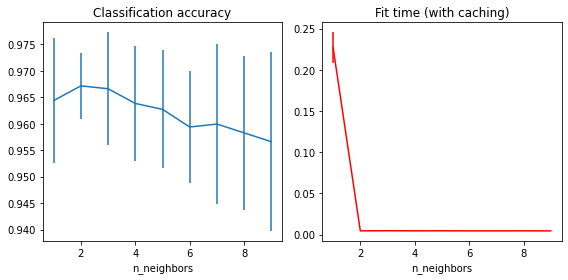

In [10]:
X, y = load_digits(return_X_y=True)
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X, y)

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[1].errorbar(x=n_neighbors_list, y=grid_model.cv_results_['mean_fit_time'],
                 yerr=grid_model.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
plt.show()

## NCA (Neighborhood Components Analysis)
- a distance metric learning algorithm, tries to improve NN accuracy when compared to using Euclidean distance.
- Uses a variant of the Leave-One-Out NN score

## Example: NCA
- plot fake dataset (9 points, 3 classes)
- concentrate on point #3 
- link thickness = proportional to distance
- use NCA to learn embedding & re-plot after transformation
- take the embedding & find the NNs.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm
from scipy.special import logsumexp

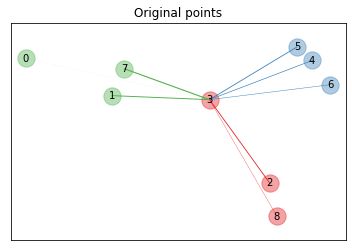

In [14]:
X, y = make_classification(n_samples=9, 
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0, 
                           n_classes=3, 
                           n_clusters_per_class=1,
                           class_sep=1.0, 
                           random_state=0)

plt.figure(1)
ax = plt.gca()
for i in range(X.shape[0]):
    ax.text(   X[i, 0], X[i, 1], str(i), va='center', ha='center')
    ax.scatter(X[i, 0], X[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax.set_title("Original points")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axis('equal')  # so that boundaries are displayed correctly as circles


def link_thickness_i(X, i):
    diff_embedded = X[i] - X
    
    # np.einsum: eval Einstein summation convention on operands
    dist_embedded = np.einsum('ij,ij->i', 
                              diff_embedded,
                              diff_embedded)
    dist_embedded[i] = np.inf

    # compute exponentiated distances (use log-sum-exp trick to
    # avoid numerical instabilities)
    exp_dist_embedded = np.exp(-dist_embedded -
                               logsumexp(-dist_embedded))
    return exp_dist_embedded


def relate_point(X, i, ax):
    pt_i = X[i]
    for j, pt_j in enumerate(X):
        thickness = link_thickness_i(X, i)
        if i != j:
            line = ([pt_i[0], pt_j[0]], [pt_i[1], pt_j[1]])
            ax.plot(*line, c=cm.Set1(y[j]),
                    linewidth=5*thickness[j])


i = 3
relate_point(X, i, ax)
plt.show()

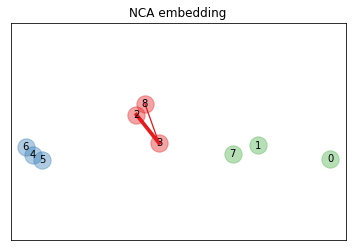

In [15]:
nca = NeighborhoodComponentsAnalysis(max_iter=30, random_state=0)
nca = nca.fit(X, y)

plt.figure(2)
ax2 = plt.gca()
X_embedded = nca.transform(X)
relate_point(X_embedded, i, ax2)

for i in range(len(X)):
    ax2.text(X_embedded[i, 0], 
             X_embedded[i, 1], 
             str(i), va='center', ha='center')
    ax2.scatter(X_embedded[i, 0], 
                X_embedded[i, 1], 
                s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax2.set_title("NCA embedding")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.axis('equal')
plt.show()

## NCA Classification
- NCA advantages: it naturally handles multiclass problems without increased model size, and doesn't require additional parameters.
- Shown to work well with various datasets
- Does not require assumptions about class distributions (contrast to LDA).
- Can naturally produced very irregular decision boundaries.

In [16]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X, y                             = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.7, 
                                                    random_state=42)
nca      = NeighborhoodComponentsAnalysis(random_state=42)
knn      = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.9619047619047619


## Example: NN with/without NCA
- plot NN classifier decision boundaries using Euclidean distance
- compare original features to NCA transformation
- NCA looks for linear transform that maxes stochastic NN classifier accuracy.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline

In [18]:
n_neighbors = 1
dataset     = datasets.load_iris()
X, y        = dataset.data, dataset.target
X           = X[:, [0, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

h          = .01  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
names      = ['KNN', 'NCA, KNN']

In [19]:
classifiers = [Pipeline([('scaler', StandardScaler()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ]),
               Pipeline([('scaler', StandardScaler()),
                         ('nca', NeighborhoodComponentsAnalysis()),
                         ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
                         ])
               ]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

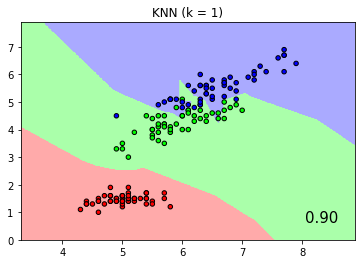

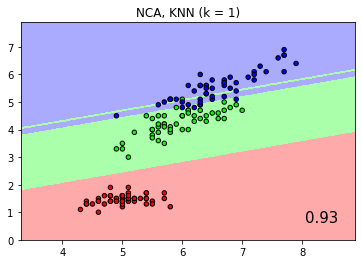

In [20]:
for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

## NCA and supervised dimensionality reduction
- inputs projected onto a linear subspace
- use ```n_components``` to set dimensionality

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
n_neighbors  = 3
random_state = 0
X, y         = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.5, 
                     stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))

pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, 
                        random_state=random_state))

lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

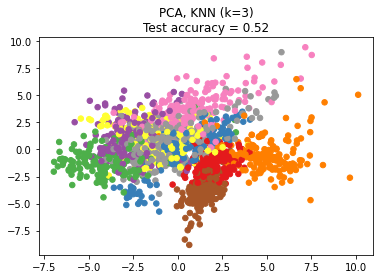

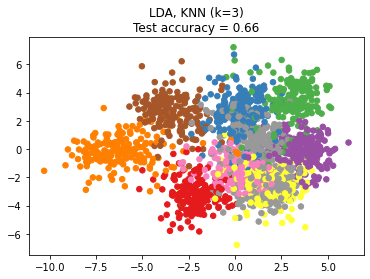

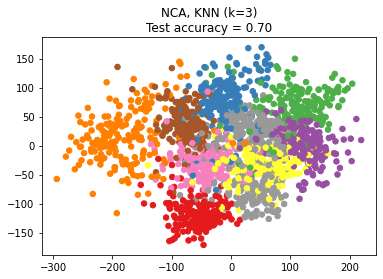

In [23]:
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    model.fit(X_train, y_train)
    knn.fit(model.transform(X_train), y_train)
    
    acc_knn    = knn.score(model.transform(X_test), y_test)
    X_embedded = model.transform(X)

    plt.scatter(X_embedded[:, 0], 
                X_embedded[:, 1], 
                c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()